In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 09 ##

## Histogram Review ##

In [3]:
galton = Table.read_table('galton.csv')

In [4]:
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [5]:
heights = galton.select(3, 7).relabeled(0, 'MidParent').relabeled(1, 'Child')

In [6]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


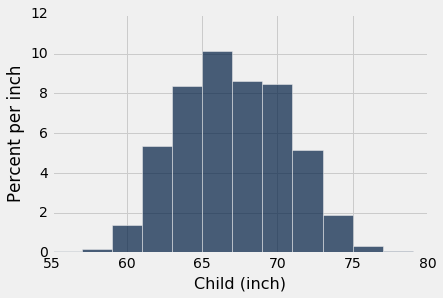

In [7]:
heights.hist(1, bins=np.arange(55, 80, 2), unit='inch')

In [10]:
heights.where(1, are.between(65, 67)).num_rows / heights.num_rows

0.20235546038543897

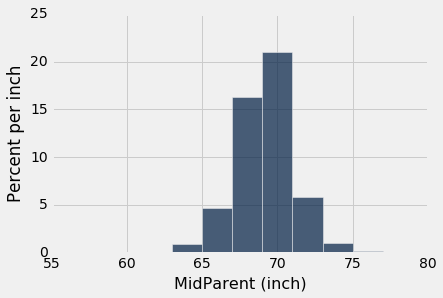

In [11]:
heights.hist(0, bins=np.arange(55, 80, 2), unit='inch')

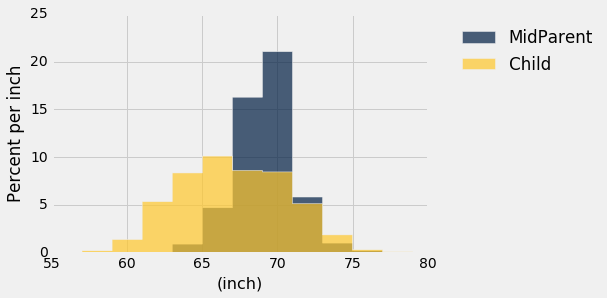

In [12]:
heights.hist(bins=np.arange(55, 80, 2), unit='inch')

## Functions ##

In [13]:
def double(x):
    return 2 * x

In [14]:
double(6)

12

In [15]:
double(10/4)

5.0

In [16]:
z = 10
double(z/4)

5.0

In [17]:
double(make_array(1, 2, 3))

array([2, 4, 6])

In [18]:
double(heights)

TypeError: unsupported operand type(s) for *: 'int' and 'Table'

In [19]:
double('abracadabra')

'abracadabraabracadabra'

In [20]:
x

NameError: name 'x' is not defined

In [21]:
x = 17
double(x)

34

In [22]:
x

17

In [23]:
double(300)

600

In [24]:
def percents(s):
    return np.round(s/sum(s) * 100, 2)

In [25]:
percents(make_array(1, 2, 3, 4))

array([ 10.,  20.,  30.,  40.])

In [26]:
percents(make_array(1, 2, 3, 43))

array([  2.04,   4.08,   6.12,  87.76])

In [27]:
def percents(s, places):
    return np.round(s/sum(s) * 100, places)

In [28]:
percents(make_array(1, 2, 3, 43), 4)

array([  2.0408,   4.0816,   6.1224,  87.7551])

## Apply ##

In [29]:
ages = Table().with_column(
    'Person', make_array('A', 'B', 'C', 'D'),
    'Age', make_array(63, 110, 99, 102)
)

In [30]:
ages

Person,Age
A,63
B,110
C,99
D,102


In [31]:
def cut_off_at_100(z):
    return min(z, 100)

In [33]:
cut_off_at_100(107)

100

In [34]:
ages.apply(cut_off_at_100, 'Age')

array([ 63, 100,  99, 100])

In [35]:
ages.with_column('Cut Off Age', ages.apply(cut_off_at_100, 'Age'))

Person,Age,Cut Off Age
A,63,63
B,110,100
C,99,99
D,102,100


In [36]:
type(cut_off_at_100)

function

## Prediction ##

In [44]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


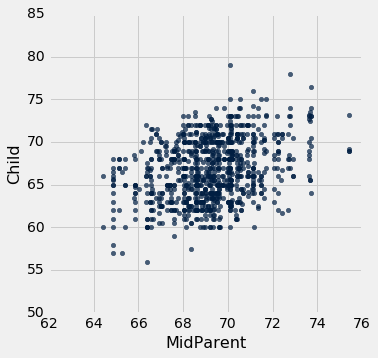

In [38]:
heights.scatter(0, 1)

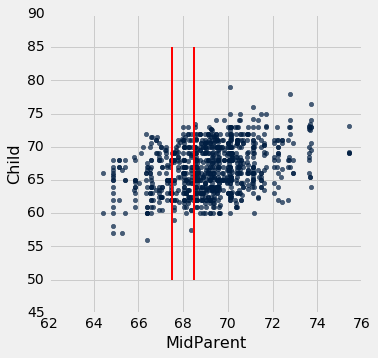

In [42]:
heights.scatter(0, 1)
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [43]:
heights.where('MidParent', are.between(67.5, 68.5)).column('Child').mean()

66.24045801526718